# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: Several questions can be asnwered by the provided data. The tables that have been given to us focus on data relating to three cities - Washington, Chicago and New York City. A preliminary look into the datasets' structure and variables will provide anyone the idea that the concerned datasets record details of eaach journey made by a customer. These customers are either 'registered' or 'casual' customers; their addresses, the duration that took their journeys to end, start and ending dates and several other things are presented there.

In such circumstances, one could pose ask on the average duration of a journey that customers take, average distance covered in miles or kilometres (whichever unit that suits the researcher) the most used starting station and also the seasonal variations observed in the journey datasets. How do people perceive the bike service during winters or another season when one could guess that there would be a decrease in demand in the bike usage? This can again be used as base to answer several other questions such as the seasonal trends of the averall dataset regarding all the variables concerned - duration of the journeys and subscriber type. There could be more registered users using the bikes in one season while casual customers might use it in another. I would personally try to answer the questions regarding the business trends of the service in these cities, like so:

- Do users use these bikes to travel a larger share of longer distances or do they use them to travel short commuting distances? 
- Over time, has the purpose of the service changed from a short commuting service to covering larger distances or is it vice versa? Has it remained more or less constant in the time periods that the datasets cover? 
- If a business trend can be extracted from these datasets, wht will one observe when looking into the customer base? Has the company ben able to expand its customer base and have more users registered themselves as regular subscribers or do people use it more as a casual commuting service or has it remained more or less uniform throughout the period? These and many more questions can be framed for answering the basic purpose of the research.

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [3]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
from collections import OrderedDict # For additional dictionary iterations and operations
import pandas as pd # Required where dictionaries become problematic
import numpy as np # For nicer statistical operations
import matplotlib.pyplot as plt # Moved this from bottom to top
import statistics as st # For extra statistical operations
import altair as alt # Nice visualization tools
from altair import *
from IPython.display import display # Just in case some graphics do not show up

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as csvfile:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(csvfile)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip, indent= 4)
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([   ('tripduration', '839'),
                ('starttime', '1/1/2016 00:09:55'),
                ('stoptime', '1/1/2016 00:23:54'),
                ('start station id', '532'),
                ('start station name', 'S 5 Pl & S 4 St'),
                ('start station latitude', '40.710451'),
                ('start station longitude', '-73.960876'),
                ('end station id', '401'),
                ('end station name', 'Allen St & Rivington St'),
                ('end station latitude', '40.72019576'),
                ('end station longitude', '-73.98997825'),
                ('bikeid', '17109'),
                ('usertype', 'Customer'),
                ('birth year', ''),
                ('gender', '0')])

City: Chicago
OrderedDict([   ('trip_id', '9080545'),
                ('starttime', '3/31/2016 23:30'),
                ('stoptime', '3/31/2016 23:46'),
                ('bikeid', '2295'),
                ('tripduration', '926'),
                ('fro

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
datum = {}

def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city == 'NYC':
        # For New York
        duration = float(datum['tripduration'])/60
    
    elif city == 'Chicago':
        # For Chicago
        duration = float(datum['tripduration'])/60
    
    else:
        # For Washington
        duration = float(datum['Duration (ms)'])/60000
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    
    if city == 'NYC':
        # Extract out the whole string.
        raw_date_time = datum['starttime']
        
        # Parse the string to the correct format.
        parsed_date_time = datetime.strptime(raw_date_time, '%m/%d/%Y %H:%M:%S')
        
        # After getting the datetime object, slice out only the date portion.
        split_date = datetime.date(parsed_date_time)
        
        # Slice out the time portion similar to the above step.
        split_time = datetime.time(parsed_date_time)
        
        # Extract month, hour and the concerned day of the week.
        month = int(split_date.strftime('%m'))
        
        hour = int(split_time.strftime('%H'))
        
        day_of_week = split_date.strftime('%A')
        
    
    if city == 'Chicago':
        # Repeat above steps for Chicago
        raw_date_time = datum['starttime']
        
        parsed_date_time = datetime.strptime(raw_date_time, '%m/%d/%Y %H:%M')
        
        split_date = datetime.date(parsed_date_time)
        
        split_time = datetime.time(parsed_date_time)
        
        month = int(split_date.strftime('%m'))
        
        hour = int(split_time.strftime('%H'))
        
        day_of_week = split_date.strftime('%A')
        
    
    if city == 'Washington':
        # Repeat above steps for Washington.
        raw_date_time = datum['Start date']
        
        parsed_date_time = datetime.strptime(raw_date_time, '%m/%d/%Y %H:%M')
        
        split_date = datetime.date(parsed_date_time)
        
        split_time = datetime.time(parsed_date_time)
        
        month = int(split_date.strftime('%m'))
        
        hour = int(split_time.strftime('%H'))
        
        day_of_week = split_date.strftime('%A')
        
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
   
    # YOUR CODE HERE
    # Here my approach would be to extract the user type filed for each dictionary 
    # and subsequently convert the value according to a condition/criteria.
    
    # Let's do this for Washington.
    # If 'member type' is registered, convert it to 'Subscriber', else convert it to 'Customer'.
    
    if city == 'NYC':
        user_type = str(datum['usertype'])
    
    elif city == 'Chicago':
        user_type = str(datum['usertype'])

    else:
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
            
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
from csv import writer

def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as csv_out, open(in_file, 'r') as csv_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(csv_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(csv_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = int(duration_in_mins(row, city))
            new_point['month'] = time_of_trip(row, city)[0]
            new_point['hour'] = time_of_trip(row, city)[1]
            new_point['day_of_week'] = str(time_of_trip(row, city)[2])
            new_point['user_type'] = str(type_of_user(row, city))
            
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([   ('duration', '7'),
                ('month', '3'),
                ('hour', '22'),
                ('day_of_week', 'Thursday'),
                ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([   ('duration', '15'),
                ('month', '3'),
                ('hour', '23'),
                ('day_of_week', 'Thursday'),
                ('user_type', 'Subscriber')])

City: NYC
OrderedDict([   ('duration', '13'),
                ('month', '1'),
                ('hour', '0'),
                ('day_of_week', 'Friday'),
                ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer to be found below!**

In [1]:
# Define a functon that puts commas at the relevant place for a numeral.

# This function was written down referring to the following post at stackoverflow.
# https://stackoverflow.com/questions/48066093/adding-punctuations-inside-dictionary-values
def put_comma(x):
    if len(x) == 5: return x[0:2] + ',' + x[2:]
    elif len(x) == 6: return x[0:3] + ',' + x[3:]
    else: return x

def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        trip_tally = {'Subscribers': str(n_subscribers), 'Customers': str(n_customers), 'Total': str(n_total)}
        
        for key, value in trip_tally.items():
            trip_tally[key] = put_comma(value)
            
        return trip_tally

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

city_data_file = {'NYC': './data/NYC-2016-Summary.csv',
                  'Chicago': './data/Chicago-2016-Summary.csv',
                  'Washington':'./data/Washington-2016-Summary.csv'}

for city, data in city_data_file.items():
    print(city, ':', number_of_trips(data))

NYC : {'Subscribers': '245,896', 'Customers': '30,902', 'Total': '276,798'}
Chicago : {'Subscribers': '54,982', 'Customers': '17,149', 'Total': '72,131'}
Washington : {'Subscribers': '51,753', 'Customers': '14,573', 'Total': '66,326'}


**Answer 4a: Edited answer as per the review.**

The part for which we calculate proportions is to be found in the cell following this one from **_In[18]_**. This is the unedited output for `number_of_trips()`.

As can be seen from the output, the city of New York records the highest number of subscribers with 245,896 out of a total of 276,798 individuals who made trips in 2016 (also the highest among all three) recorded in 2016. In terms of percentage, New York also recorded the highest propertion of trips made by subscribers. I show an output, similar to the above in a code cell below, but with outputs in percentages. 

In [18]:
# In this cell, I'll use similar functionality as seen from the cell above
# but with output that shows the proportion of rides made by user_type 
# for each of the three cities and then we compare the results.
# Results to be interpreted in percentages.

def proportion_of_rides(file):
    
    # Define the usual dictionary
    with open(file, 'r') as csvfile:
        trip_reader = csv.DictReader(csvfile)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        prop_subscribers = 0
        prop_customers = 0
        
        # Count number of subscribers and customers.
        # Use above method to return a dict.
        for row in trip_reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
                
        # Compute total number of individuals.
        n_total = n_subscribers + n_customers
        
        # Return tally
        trip_tally = {'Subscribers': float(n_subscribers), 'Customers': float(n_customers), 'Total': float(n_total)}
        
        prop_subscribers = (float(trip_tally['Subscribers'])/float(trip_tally['Total'])) * 100
        prop_customers = (float(trip_tally['Customers'])/float(trip_tally['Total'])) * 100
        
        trip_tally_props = {'Subscribers': round(prop_subscribers, 2), 'Customers': round(prop_customers, 2)}
        
        return trip_tally_props


In [19]:
# Testing

city_data_file = {'NYC': './data/NYC-2016-Summary.csv',
                  'Chicago': './data/Chicago-2016-Summary.csv',
                  'Washington':'./data/Washington-2016-Summary.csv'}

for city, data in city_data_file.items():
    print(city, ':', proportion_of_rides(data))

NYC : {'Subscribers': 88.84, 'Customers': 11.16}
Chicago : {'Subscribers': 76.23, 'Customers': 23.77}
Washington : {'Subscribers': 78.03, 'Customers': 21.97}


As continuation to **Answer 4a**, the above cell listed down the proportion of trips made by user types. As is evident, New York reported the highst percent figure for subcribers (88.84%) against just 11.16% for customers. For non-subscribers, Chicago reported the highest number at 23.77%. New York thus has the majority of their records as subscribers.

> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer to be found below**

In [3]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def avg_trip_length_and_prop(filename):
    """
    This function returns the average length of duration for each city as well
    as the proportion of rides that are longer than 30 minutes in percentages.
    """
    # Executes the function by first defining a csv dataframe loaded by pandas #
    # and running qppropriate operations on that dataframe. These operations   #
    # include simple math like average and division to find a float value.     #
    
    # Step 1. Load the csv file.
    data = pd.read_csv(filename)

    # Step 2. Define appropriate variables.
    avg_dur = 0
    long_ride = 0
    short_ride = 0
    dat_length = 0
    prop_ride = 0
    
    # Step 3. Find the average.
    avg_dur = np.mean(data['duration'])

    # Step 4. Find out the number of rides < 30 minutes.
    for index, row in data.iterrows():
        if row['duration'] > 30:
            long_ride += 1
        else:
            short_ride += 1
        
    # Step 5. Divide (4) by number of observations to get the final value.
    dat_length = len(data)
    prop_ride = (long_ride/dat_length) * 100
    return round(avg_dur, 2), round(prop_ride, 2)
    

In [11]:
# Test cell to check results

nyc = './data/NYC-2016-Summary.csv'
chicago = './data/Chicago-2016-Summary.csv'
washington = './data/Washington-2016-Summary.csv'

nyc_print = print('For New York, the average trip recorded was {} minutes and proportion of rides longer than 30 minutes was {}%.'.
                 format(avg_trip_length_and_prop(nyc)[0], avg_trip_length_and_prop(nyc)[1]))

chicago_print = print('For Chicago, the average trip recorded was {} minutes and proportion of rides longer than 30 minutes was {}%.'.
                 format(avg_trip_length_and_prop(chicago)[0], avg_trip_length_and_prop(chicago)[1]))

wash_print = print('For Washington, the average trip recorded was {} minutes and proportion of rides longer than 30 minutes was {}%.'.
                 format(avg_trip_length_and_prop(washington)[0], avg_trip_length_and_prop(washington)[1]))


For New York, the average trip recorded was 15.32 minutes and proportion of rides longer than 30 minutes was 6.61%.
For Chicago, the average trip recorded was 16.07 minutes and proportion of rides longer than 30 minutes was 7.66%.
For Washington, the average trip recorded was 18.43 minutes and proportion of rides longer than 30 minutes was 10.24%.


**Answer 4b**: As can be seen from the output, the average trip length in rounded decimals has been returned for each city, with Washington recording the longest mean trip duration (18.43 minutes), followed by Chicago (16.07 minutes) and New York (15.32 minutes) in reverse order. On a similar note, the percent of rides taken at a duration of greater than 30 minutes was also the highest for Washington (10.24%) followed by Chicago (7.66%) and lowest for New York (6.61%).

**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer to be found below!**

In [8]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def who_rides_longest(filename):
    """
    This function returns a dataframe by reading a csv file, subsets the dataframe 
    according to the customer type and returns results that suggest which of the 
    customer categories took the longest ride for each city.
    """
    # Load the csv
    city_dat = pd.read_csv(filename)
    
    # Subset for subscribers
    subsc_dat = city_dat[city_dat.user_type == 'Subscriber']
    
    #Subset for customers
    cust_dat = city_dat[city_dat.user_type == 'Customer']
    
    # Find out subscribers' average
    subsc_avg = np.mean(subsc_dat['duration'])
    
    # Find out customers' average
    cust_avg = np.mean(cust_dat['duration'])
    
    # Return values
    return round(subsc_avg), round(cust_avg)

In [9]:
nyc = './data/NYC-2016-Summary.csv'
chicago = './data/Chicago-2016-Summary.csv'
washington = './data/Washington-2016-Summary.csv'

nyc_print = print('For New York, subscribers took an average of {} minutes while customers took an average of {} minutes.'.
                 format(who_rides_longest(nyc)[0], who_rides_longest(nyc)[1]))

chicago_print = print('For Chicago, subscribers took an average of {} minutes while customers took an average of {} minutes.'.
                 format(who_rides_longest(chicago)[0], who_rides_longest(chicago)[1]))

wash_print = print('For Washington, subscribers took an average of {} minutes while customers took an average of {} minutes.'.
                 format(who_rides_longest(washington)[0], who_rides_longest(washington)[1]))

For New York, subscribers took an average of 13.0 minutes while customers took an average of 32.0 minutes.
For Chicago, subscribers took an average of 12.0 minutes while customers took an average of 30.0 minutes.
For Washington, subscribers took an average of 12.0 minutes while customers took an average of 41.0 minutes.


**Answer 4c:** As can be seen from the output above, Washington recorded the longest mean trips for customers while suubscribers took on an average only 12 minutes in the same city. The variation in these figures is very minute for all the three cities with New York recording 13 minutes for subscribers (the maximum out of all three). On the contrary, customers ride longer than usual with minimum being 30 minutes for Chicago.

This could mean that casual customers are simply one-time users of the bike service and prefer to travel longer distances than their subscriber counterparts who would want to prefer taking rides shorter than 30 minutes because of the extra charges they expend. For customers, cashing out some extra money for a one-time ride that is convenient and does its job is certainly preferable.

<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

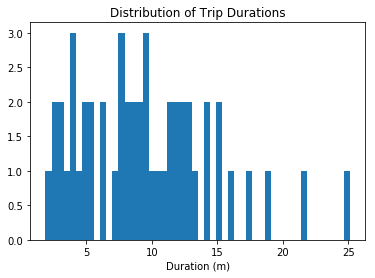

In [28]:
# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data, bins = 50)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

As a sidenote, it is important to note the skewness of a given distribution. The plot starting from **_In[31]_** seems to be skewed towards the left side indicating a negative skewness (mean is less than the mode). To some, it might look unclear since there are two bars between 5m and 10m that could suggest that the distribution is bimodal. However, running the same plot with fewer bins will make the picture clearer.

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

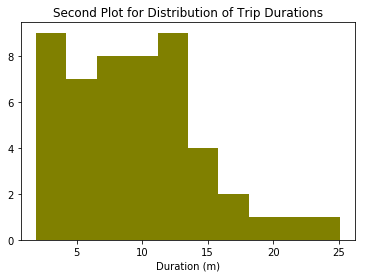

In [27]:
# Repeat above plot with fewer bins and different colour.

new_data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
            19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
            25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
             9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
             4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(new_data, bins = 10, color = 'Olive')
plt.title('Second Plot for Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

Decreasing the bins makes the data less accurate when it comes to plotting the exact values although it gives a better picutre of the shape or the spread of the distribution. While keeping the bins at 50 made the histogram look as if it could be bimodal, decreasing the bins to 10 still provides a similar conclusion; although this time the spread of the histogram is clearer that it's skewed towards the left.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

Text(0.5,1,'Distribution of Durations for New York')

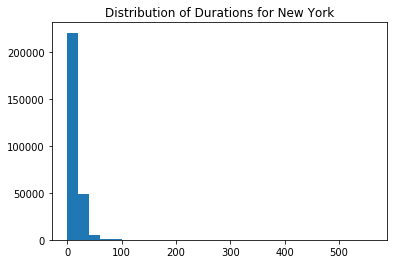

In [29]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

# Lets proceed by first selecting the csv files. We then read in the csv files
# and form appropriate subsets for the required variables before converting those 
# variables into lists and performing histogram analysis at the end.

nyc = './data/NYC-2016-Summary.csv'
chicago = './data/Chicago-2016-Summary.csv'
washington = './data/Washington-2016-Summary.csv'
bin_s = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
         320,340,360,380,400,420,440,460,480,500,520,540,560]

# Read files.
nyc_dat = pd.read_csv(nyc)
chicago_dat = pd.read_csv(chicago)
wash_dat = pd.read_csv(washington)

# Plot durations for example New York.
plt.hist(nyc_dat['duration'], bin_s)
plt.title('Distribution of Durations for New York')


This is a highly skewed distribution with most of the observations lying within 0-30 minutes of the x-axis. It is understandable; since the above plot refers to data for New York that had almost 88% of subscribers' data, it can well be said that because subscribers form the majority of the plot, a single bar is bound to exist.

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer to be found below!**

In [2]:
## Use this and additional cells to answer Question 5. ##

new_bins  = [5,10,15,20,25,30,35,40,45,50,55,60]
subs_dat = []
cust_dat = []

# We'll achieve this by defeining a function this time that reads in a csv file
# and stores it as dictionary. Simple operations for conditions will then be able to
# subset the dataset into 'subscribers' and 'customers' wherein one would be 
# able to plot simple histograms for that data.

def cust_type_plotter(filename):
    
    # Store a dictionary of data
    with open(filename, 'r') as csvfile:
        trip_reader = csv.DictReader(csvfile)
        
        # Read in the rows and append the empty lists to contain duration data
        for row in trip_reader:
            if row['user_type'] == 'Subscriber':
                subs_dat.append(int(row['duration']))
            else:
                cust_dat.append(int(row['duration']))
    
    # Plot for subscribers and customers separately.
    plt.hist(subs_dat, rwidth = 0.4, bins = new_bins)
    plt.title("Frequency Distribution for Subscribers' Durations")
    plt.xlabel('Duration (minutes)')
    plt.show()
            
    plt.hist(cust_dat, rwidth = 0.4, bins = new_bins, color = 'orange')
    plt.title("Frequency Distribution for Customers' Durations")
    plt.xlabel('Duration (minutes)')
    plt.show()


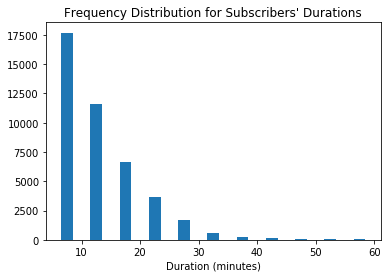

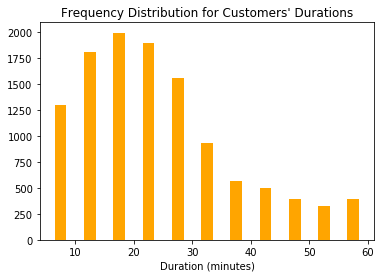

In [3]:
# Lets test this out

data = './data/Washington-2016-Summary.csv'

cust_type_plotter(data)

**Answer 5:** I selected the data for Washington City because its got a reasonable size for the processing to be reasonable as well. The frequency distribution give a very clear picture. Customers certainly seem to have fewer limits when it comes to trip durations as can be seen from the graph in orange. Its more bell shaped and gaussian looking. On the contrary, the graph in blue relates to subscribers' distribution and one can clearly see the skewness in the data. Subscribers certainly restraint themselves from taking longer rides probably because of the charges that accrue for rides longer than half an hour. While subscribers tend to take trips within 30 minutes, this is not xactly the case with customers who are more comfortable taking longer trips (well above 50 minutes for some).

However, both data are skewed to the left with customers' data more spread out suggesting the limiting preferences for subcribers.

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Wherever data is located, the limit to number of questions that can be asnwered remain unlimited. However, this is a very good opportunity to go into more details of the provided data and extract more insights of how the bike system works and its relative association with its users.

For the remaining analysis of this report, I will look into the following questions:

- What is the pattern observed when it comes to the seasonal data for the three cities?
- We have already observed the user related to patterns that suggest that subscribers prefer to take shorter rides whereas casual users use the system to take considerably longer rides. If possible, what are the patterns when it comes to regular days vs. weekends?
- Are these trends similar to all the three cities?

I proceed by answering the first question and applying the same procedure associating each cell for each of the question above.

In [4]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

## Lets answer the first question. What are the patterns when it comes
## to seasonal data? To answer this question, we need to investigate
## on how users behave according to each season. Extracting the most observed
## season on th datasets will be helpful here. As usual, where more verbose
## code will be involved, I'll make use of pandas and numpy.

# Points to remember here:
# Extract the mode of all the seasons. The season with the mode value is the season users use the system the most.
# Because of different geographical locations of the three cities, the sesonal data is bound to be different as well.
# What is the average duration of subscribers as well as customers for every season?

def mode_of_seasons(file):
    
    # Load the csv files.
    data = pd.read_csv(file)
    
    # Find the mode season for each city.
    mode = st.mode(data['month'])
    
    return mode

In [5]:
# Lets test this out

washington = './data/Washington-2016-Summary.csv'
nyc = './data/NYC-2016-Summary.csv'
chicago = './data/Chicago-2016-Summary.csv'

print('For Washington, the month for which most of the data is recorded is month {}.'.
      format(mode_of_seasons(washington)))
print('For New York, the month for which most of the data is recorded is month {}.'.
      format(mode_of_seasons(nyc)))
print('For Chicago, the month for which most of the data is recorded is month {}.'.
      format(mode_of_seasons(chicago)))


For Washington, the month for which most of the data is recorded is month 7.
For New York, the month for which most of the data is recorded is month 9.
For Chicago, the month for which most of the data is recorded is month 7.


The output we got from the above code is very interesting to note. Using Python libraries makes it very elegant and simple to release efficient output through minimal code. The simple function `mode_of_seasons()` revealed that for Washington and Chicago, the month of July records the highest demand for the bike service while New York's modal month is the month of September. From June to Semptember, these are times of vacations and off-seasons for several young users that include school-going and university students; and hence a surge in demand that can be deduced. It can thus be conclude that its the time of late summers to the beginning of autumn that there is most demand for bikes.

Similarly, we can peform some analysis regarding the user-base distribution according to seasons. We can ask the question as to how subscribers and customers behave in dominant seasons? Does the autumn season belong more to subscribers or is it more inclined towards customers? For this we can subset the parent dataframe into subscribers and customers and extract as to which season belongs to which category of users? A prelimiary guess might suggest it should come out to be similar as the results we got in the above cell, but a detailed analysis will always provide with the truth.

In [9]:
# In this cell, we'll develop a simple function like the above but this time we'll
# extract data for subscribers and customers and find out the dominant season for the
# two categories. This time, we extract results using the traditonal approach through 
# dictionaries.

subs_data = []
cust_data = []


def dominant_month_for_users(file):
    """
    This function returns the mode values regarding the month variable
    for subscribers and customers separately. In this way, one could make out when
    subscribers are the most active and when customers use the system the
    most.
    """
    
    # Define main dictionary
    with open(file, 'r') as csvfile:
        
        trip_reader = csv.DictReader(csvfile)
        
        # Count the figure for mode for wach of the user category
        for row in trip_reader:
            if row['user_type'] == 'Subscriber':
                subs_data.append(int(row['month']))
            else:
                cust_data.append(int(row['month']))
                
            
        # Count the mode for subs_data and cust_data
        subs_mode = st.mode(subs_data)
        cust_mode = st.mode(cust_data)
        
        return subs_mode, cust_mode

In [11]:
# Print results in the usual manner.

washington = './data/Washington-2016-Summary.csv'
nyc = './data/NYC-2016-Summary.csv'
chicago = './data/Chicago-2016-Summary.csv'

print('Subscribers in Washington recorded most trips in the {}th month while customers recorded the most during the {}th month.'.
     format(dominant_month_for_users(washington)[0], dominant_month_for_users(washington)[1]))
print('Subscribers in New York recorded most trips in the {}th month while customers recorded the most during the {}th month.'.
     format(dominant_month_for_users(nyc)[0], dominant_month_for_users(nyc)[1]))
print('Subscribers in Chicago recorded most trips in the {}th month while customers recorded the most during the {}th month.'.
     format(dominant_month_for_users(chicago)[0], dominant_month_for_users(chicago)[1]))

Subscribers in Washington recorded most trips in the 9th month while customers recorded the most during the 7th month.
Subscribers in New York recorded most trips in the 9th month while customers recorded the most during the 7th month.
Subscribers in Chicago recorded most trips in the 9th month while customers recorded the most during the 7th month.


As can be seen from the output above, all the three cities recorded maximum data from the month of June till September. This period of late summer to the beginning of autumn is the season where several users come out to use the system on a more frequent basis - these include lots of students as well who come out during their vacations. This could explain the mode values above.

Meanwhile, there is a gap of one month fo all the three cities when it comes to differentiating between the mode values for subscribers as well as customers. For subscribers in Washington, its the month of june that records maximum usage while for customers its the month of July. For both New York and Chicago, the month of September records the maximum usage of their bikes under the 'subscriber' category while customers use these bikes maximum in the 8th month. For Chicago, the month of July again is the month of customers.

Finally, we can have several visualizations for the above released output. Many packages are available that include `matplotlib` as the most popular. However, there are others too like `seaborn` and `altair` as well. Since this is the first time I've developed a comprehensive python notebook, some of my graphic outputs here will be made through the `altair` library because of some nice examples I've seen under its official documentation and examples reproduced at stackoverflow.

For this, we first proceed by extracting relevant information from the dataframes available with us, concatenating those values into new dataframes and running graphic code on them.

   Subscribers' Month  Customers' Month        City
0                   6                 7  Washington
1                   9                 8    New York
2                   6                 7     Chicago


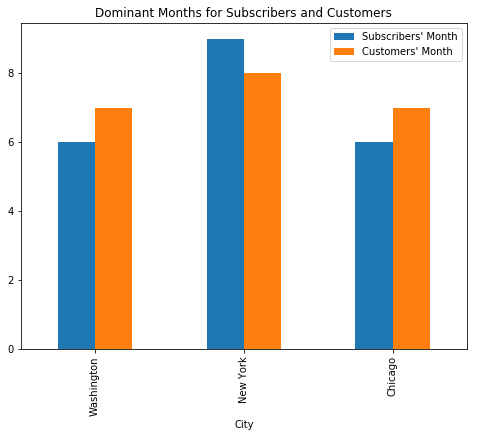

In [36]:
# Visualizing dominant months for all the three cities according to subscribers and customers

# Refer to the csv files first.
washington = './data/Washington-2016-Summary.csv'
nyc = './data/NYC-2016-Summary.csv'
chicago = './data/Chicago-2016-Summary.csv'

# Read parent dataframe for each file.
wash_df = pd.read_csv(washington)
nyc_df = pd.read_csv(nyc)
chicago_df = pd.read_csv(chicago)

# Subset for subscribers and customers
wash_subs = wash_df[wash_df.user_type == 'Subscriber']
wash_custs = wash_df[wash_df.user_type == 'Customer']

nyc_subs = nyc_df[nyc_df.user_type == 'Subscriber']
nyc_custs = nyc_df[nyc_df.user_type == 'Customer']

chicago_subs = chicago_df[chicago_df.user_type == 'Subscriber']
chicago_custs = chicago_df[chicago_df.user_type == 'Customer']

# Extract mode values and store them
wash_subs_mode = st.mode(wash_subs['month'])
wash_cust_mode = st.mode(wash_custs['month'])

nyc_subs_mode = st.mode(nyc_subs['month'])
nyc_cust_mode = st.mode(nyc_custs['month'])

chicago_subs_mode = st.mode(chicago_subs['month'])
chicago_cust_mode = st.mode(chicago_custs['month'])

# Store these values into a dataframe
value_df = pd.DataFrame([[wash_subs_mode, wash_cust_mode, 'Washington'],
                        [nyc_subs_mode, nyc_cust_mode, 'New York'],
                        [chicago_subs_mode, chicago_cust_mode, 'Chicago']],
                        columns = ["Subscribers' Month", "Customers' Month", "City"])

print(value_df)

# Give shape to our final chart
value_df.plot(kind = 'bar', x = 'City', sharex = True, title = 'Dominant Months for Subscribers and Customers',
             figsize = (8,6))

For every code that prints an output, there should always be a visualization accompanying it, since it reinforces the results from just being textual to graphical. The human brain is wired to recognise patterns and extract insights from it. The above plot makes things much simpler for a layman where the dominant month can be seen for each city. While for Washington, subscribers tend to use the service the most in the month of June, customers record most of their trips in the following month of July. For New York though, its interesting to note differing months for each of the user type. While customers in 2016 recorded most trips in the 8th month, subscribers recorded them well into the 9th month!

This concludes my work for this Python notebook. Hope it was an enjoyable read and hoping so far that I will get the appropirate grades for it. This is the edited version on request of the reviewer to add some more details and correct answer to qeustion 4c. Some more details have been added wherever I thought it will add value to the document. If any of the rubric is still left, I will most passionately make additions.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: Since I'm a student from an economics/finance background with applications in statistics, my focus in data science will always be application of data analytics and artificia intellligence in financial and economic fields. Statistics is an integral part of economic application and modern techniques of scientific computing is unleashing an alogether new kinds of discoveries and results that have some major implications for the economic world and how we can make it better by digging more insights from it. I intend to be a part of this movement where I can design some algorithms and write excellent, artistic code to discover what's going on around us.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0